<hr style="border:2px solid #808080"> </hr>
<center><h1 style="color:#03122E;"> Álgebra Lineal Numérica IMT2111</h1></center>
<center><h1 style="color:#173F8A;"> Capítulo 1: Conceptos basicos. Producto matriz-vector rapido</h3></center>
<center><h1 style="color:#0176DE;"> Prof. Manuel A. Sánchez</h3></center>
<hr style="border:2px solid #808080"> </hr>

## **Tabla de contenidos**

1. [**FFT** - Transformada rapida de Fourier](#Transformada-rapida-de-Fourier)
    1. [FFT de Numpy](#Numpy-FFT)
    2. [DCT](#Transformada-rapida-de-coseno)

2. [**Compresion JPEG**](#COMPRESION-JPEG)

In [1]:
import numpy as np # numerical linear algebra library
import scipy as sp # scientific computing library
import matplotlib.pyplot as plt # visualization library
from scipy.fft import dct as spdct

## Transformada rapida de Fourier

In [2]:
def fft(x,n):
    '''
    Input : n = 2^t, x\in R^n
    Output: y = F_n * x, discrete Fourier transform
    '''
    if n == 1:
        return x
    else:
        m = int(n/2)
        yT = fft(x[::2],m)
        yB = fft(x[1::2],m)
        omega = np.exp(-np.pi*1j/m)
        d = np.array([omega**j for j in range(m)])
        z = d*yB#np.multiply(d,yB)
        return np.concatenate([yT+z, yT-z])

## Numpy FFT

error : 1.6582114704983864e-13


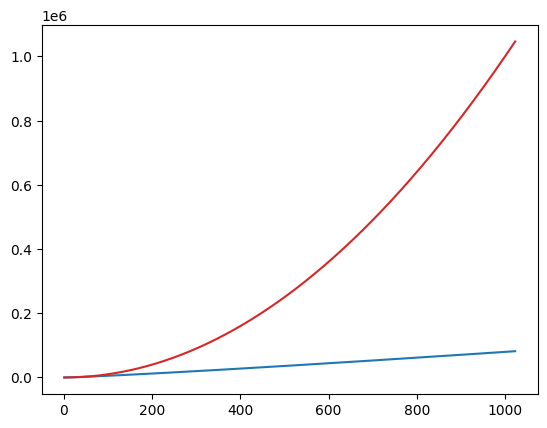

In [3]:
n= 2**8; x= np.random.rand(n)
# fft computed using our algorithm
y  = fft(x,n)
# fft computed using numpy
ynp = np.fft.fft(x,n)
print('error :', np.linalg.norm(y-ynp))

orderfft = lambda n:8*n*np.log2(n)
ordermult = lambda n: n**2
nplot = np.arange(1,2**10)
plt.plot(nplot, orderfft(nplot)); plt.plot(nplot, ordermult(nplot), 'C03'); plt.show()

In [4]:
%timeit fft(x,n)
%timeit np.fft.fft(x,n)

2.58 ms ± 143 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.26 µs ± 239 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


<h2 style="color:#E3AE00 ;text-align:center;"> Es posible acelerar nuestro codigo ?<br> </h2>

## Transformada rapida de coseno

In [5]:
def dct(x,m):
    Extilde=x[m-1:0:-1]
    xcos = np.concatenate([x,Extilde])
    ytilde = fft(xcos, 2*m).real
    return 0.5*ytilde[0:m+1]

In [6]:
n= 2**3; x= np.random.rand(n+1)
ydct = dct(x,n)
yspdct = 0.5*spdct(x,1)
print('error :', np.linalg.norm(ydct-yspdct))

error : 5.551115123125783e-17


## COMPRESION JPEG

In [13]:
from numpy.random import rand, randint
from numpy import linspace, meshgrid
from matplotlib.pyplot import imshow, plot, axis
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.fft import dct, idct
from PIL import Image

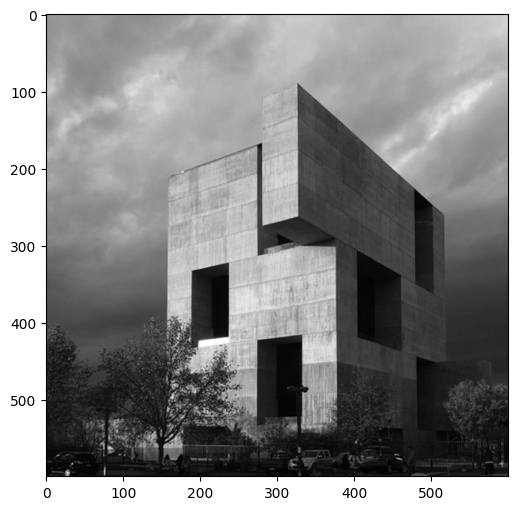

In [14]:
img = Image.open('edif_elemental.png')
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

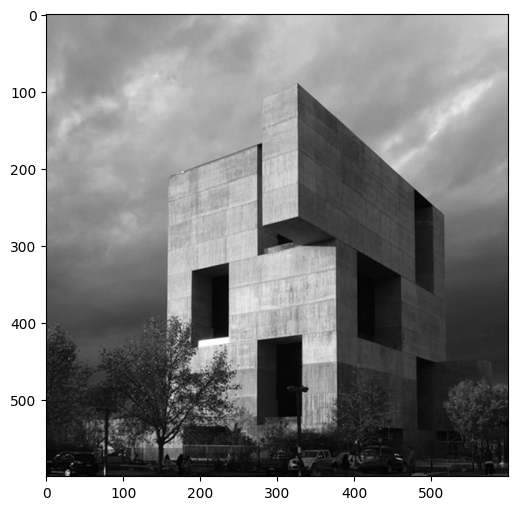

In [9]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

In [10]:
Q_JPEG = np.array([[201, 200, 195, 193, 185, 181, 185, 182],
                   [204, 206, 206, 208, 203, 196, 196, 189],
                   [205, 204, 201, 204, 204, 204, 209, 205],
                   [213, 208, 201, 200, 199, 200, 206, 203],
                   [213, 211, 206, 206, 199, 190, 186, 176],
                   [226, 227, 226, 228, 222, 214, 211, 202],
                   [229, 229, 228, 230, 228, 227, 234, 232],
                   [230, 230, 227, 228, 223, 223, 230, 229]], dtype=np.float64)

In [11]:
A = imgmat
C = np.zeros(A.shape)
Nx, Ny = imgmat.shape
nx = int(Nx/8); ny = int(Ny/8)

nnonzeroentries = 0
for i in range(nx):
    for j in range(ny):
        Ablock = A[i*8:(i+1)*8, j*8:(j+1)*8]
        Ablock = Ablock-128
        B = dct(dct(Ablock, axis=0), axis=1)
        BdQ = np.divide(B,Q_JPEG)
        Btocompress = np.around(BdQ)
        nnonzeroentries += np.count_nonzero(Btocompress)
        
        # Decode
        CQ = np.multiply(Btocompress,Q_JPEG)
        Cblock = idct(idct(CQ, axis=0), axis=1)
        Cblock = np.around(Cblock) 
        Cblock +=128
        C[i*8:(i+1)*8, j*8:(j+1)*8] = Cblock

print("Numero total de entradas:", A.size)
print("Numero de entradas no cero de A", np.count_nonzero(A))
print("number de entradas no cero de A comprimida:", nnonzeroentries)
print("La distancia or norma entre la imagen original y la imagen comprimida:", np.linalg.norm(A-C))

Numero total de entradas: 360000
Numero de entradas no cero de A 359953
number de entradas no cero de A comprimida: 58238
La distancia or norma entre la imagen original y la imagen comprimida: 1222.6221820333542


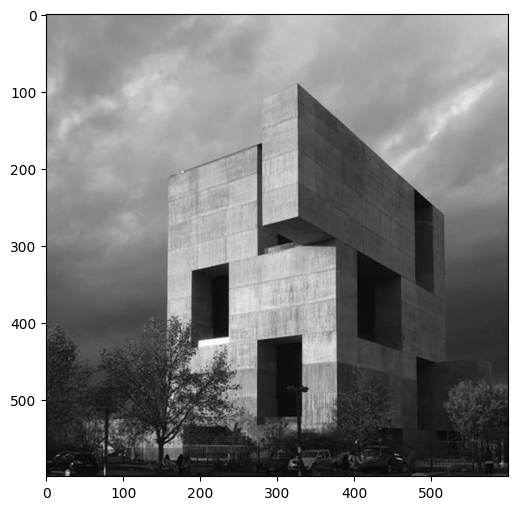

In [12]:
plt.figure(figsize=(9,6))
plt.imshow(C, cmap='gray');